In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'avconv'

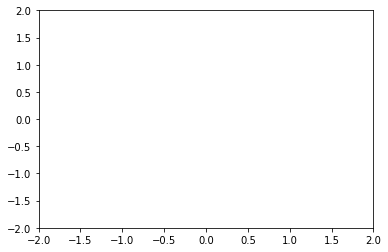

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], 'o')

In [3]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [4]:
# initialize particles
n_particles = 16
x = np.empty(n_particles,dtype=float)
y = np.empty(n_particles,dtype=float)
temp = np.arange(-2.0,2.0,4.0/float(np.sqrt(n_particles)))
count=0
for i in range(len(temp)):
    for j in range(len(temp)):
        x[count] = temp[i]
        y[count] = temp[j]
        count += 1

In [5]:
# propogate points randomly
def animate(i):
    global x, y
    x = x + np.random.rand(n_particles)*0.1-0.05
    y = y + np.random.rand(n_particles)*0.1-0.05
    # wrap x and y
    for i in range(n_particles):
        if x[i] > 2.0:
            x[i] -= 4.0
        elif x[i] < -2.0:
            x[i] += 4.0
        if y[i] > 2.0:
            y[i] -= 4.0
        elif y[i] < -2.0:
            y[i] += 4.0
    line.set_data(x, y)
    return (line,)

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=True)

In [7]:
HTML(anim.to_jshtml())

In [8]:
# compute Lennard-Jones force
def compute_lj_force(x,y):
    eps = 1.0
    sigma = 1.0
    
    n_particles = len(x)
    r = np.empty(2,dtype=float)
    fx = np.zeros(n_particles,dtype=float)
    fy = np.zeros(n_particles,dtype=float)
    for i in range(n_particles-1):
        for j in range(i+1,n_particles):
            r[0] = x[i] - x[j]
            r[1] = y[i] - y[j]
            if r[0] > 2.0:
                r[0] -= 4.0
            elif r[0] < -2.0:
                r[0] += 4.0
            if r[1] > 2.0:
                r[1] -= 4.0
            elif r[1] < -2.0:
                r[1] += 4.0
            r_mag = np.linalg.norm(r)
            r_hat = r/r_mag
            f = 24.0*eps*sigma**6*(2.0*sigma**6/r_mag**13 - 1.0/r_mag**7)*r_hat
            fx[i] += f[0]
            fy[i] += f[1]
            fx[j] -= f[0]
            fy[j] -= f[1]
    return fx, fy

In [19]:
# compute harmonic force
def compute_harmonic_force(x,y):
    k = 1.0
    x0 = 1.0
    
    n_particles = len(x)
    r = np.empty(2,dtype=float)
    fx = np.zeros(n_particles,dtype=float)
    fy = np.zeros(n_particles,dtype=float)
    for i in range(n_particles-1):
        for j in range(i+1,n_particles):
            r[0] = x[i] - x[j]
            r[1] = y[i] - y[j]
            if r[0] > 2.0:
                r[0] -= 4.0
            elif r[0] < -2.0:
                r[0] += 4.0
            if r[1] > 2.0:
                r[1] -= 4.0
            elif r[1] < -2.0:
                r[1] += 4.0
            r_mag = np.linalg.norm(r)
            r_hat = r/r_mag
            f = -k*(r_mag-x0)*r_hat
            fx[i] += f[0]
            fy[i] += f[1]
            fx[j] -= f[0]
            fy[j] -= f[1]
    return fx, fy

In [9]:
# initialize particle positions
n_particles = 16
x = np.empty(n_particles,dtype=float)
y = np.empty(n_particles,dtype=float)
temp = np.arange(-2.0,2.0,4.0/float(np.sqrt(n_particles)))
count=0
for i in range(len(temp)):
    for j in range(len(temp)):
        x[count] = temp[i] + np.random.rand()*0.1-0.05
        y[count] = temp[j] + np.random.rand()*0.1-0.05
        count += 1
# propogate according to gradient (minimize energy)
def animate(i):
    global x, y
    dx = dy = 0.0001
    fx, fy = compute_lj_force(x,y)
    x = x + fx*dx
    y = y + fy*dy
    # wrap x and y
    for i in range(n_particles):
        if x[i] > 2.0:
            x[i] -= 4.0
        elif x[i] < -2.0:
            x[i] += 4.0
        if y[i] > 2.0:
            y[i] -= 4.0
        elif y[i] < -2.0:
            y[i] += 4.0
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=100, blit=True)
HTML(anim.to_jshtml())